# STC Jawwy

In [20]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
#!pip install pyxlsb
#!pip install statsmodels

In [2]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [3]:
dataframe = pd.read_excel("stc TV Data Set_T2.xlsb",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [4]:
# check the data shape
dataframe.shape

(86, 2)

In [5]:
# display the first 5 rows 
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [6]:
# display the dataset after applying data types
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [7]:
# describe the numeric values in the dataset
dataframe.describe()

,Total_watch_time_in_houres
count,86.000000
mean,780.817926
std,122.992002
min,562.124722
25%,707.709653
50%,763.181389
75%,840.985278
max,1123.551944


In [8]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [49]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [10]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [11]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [12]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

<Figure size 3600x3600 with 0 Axes>

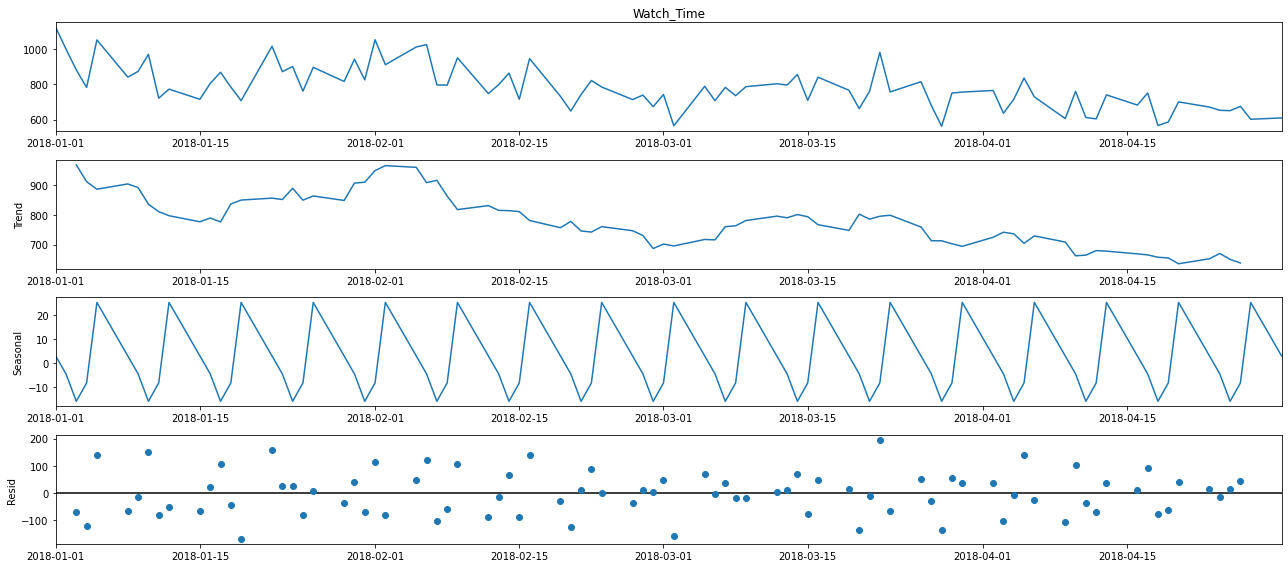

In [62]:
"""
TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results
"""
df = dataframe.copy()
df = df.rename(columns={"Total_watch_time_in_houres" : "Watch_Time"} ) #Watch_Time is in hours


plt.figure(figsize=(50,50))
decomposition = sm.tsa.seasonal_decompose(df["Watch_Time"], model='additive')
fig = decomposition.plot()
plt.show()

#Alt way to check for stationarity 
# #Ho: It is non stationary
# #H1: It is stationary
# test_results = adfuller(df["Watch_Time"])
# labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
# for value,label in zip(test_results,labels):
#     print(label+' : '+str(value) )
# if test_results[1] <= 0.05:
#     print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
# else:
#     print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ") 

